In [160]:
import pandas as pd


# New Section

In [161]:
df = pd.read_csv('Health.csv')
df.head()

,REF_DATE,GEO,DGUID,Age group in 2019,Gender in 2019,Status,Indicators,Characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2023,Canada,NaN,"Total, 12 to 17 years","Total, Gender+",Reported indicator in 2019 only,"Perceived health, excellent or very good",Number of persons,Number,223,units,0,v1598161616,1.1.1.1.1.1,423500.0,NaN,NaN,NaN,0
1,2023,Canada,NaN,"Total, 12 to 17 years","Total, Gender+",Reported indicator in 2019 only,"Perceived health, excellent or very good","Low 95% confidence interval, number of persons",Number,223,units,0,v1598161617,1.1.1.1.1.2,389100.0,NaN,NaN,NaN,0
2,2023,Canada,NaN,"Total, 12 to 17 years","Total, Gender+",Reported indicator in 2019 only,"Perceived health, excellent or very good","High 95% confidence interval, number of persons",Number,223,units,0,v1598161618,1.1.1.1.1.3,457900.0,NaN,NaN,NaN,0
3,2023,Canada,NaN,"Total, 12 to 17 years","Total, Gender+",Reported indicator in 2019 only,"Perceived health, excellent or very good",Percent,Percent,239,units,0,v1598161619,1.1.1.1.1.4,18.6,NaN,NaN,NaN,1
4,2023,Canada,NaN,"Total, 12 to 17 years","Total, Gender+",Reported indicator in 2019 only,"Perceived health, excellent or very good","Low 95% confidence interval, percent",Percent,239,units,0,v1598161620,1.1.1.1.1.5,17.1,NaN,NaN,NaN,1


In [162]:
df.duplicated().sum()


0

In [163]:
df.isna().sum()


,0
REF_DATE,0
GEO,0
DGUID,4968
Age group in 2019,0
Gender in 2019,0
Status,0
Indicators,0
Characteristics,0
UOM,0
UOM_ID,0


In [164]:
# Define the cleaning function
def clean_data_revised(df):
    # Drop entirely null columns
    df = df.drop(columns=['SYMBOL', 'TERMINATED'], errors='ignore')

    # Drop rows with missing VALUE as it's a key metric
    df = df.dropna(subset=['VALUE'])

    # Handle missing STATUS values
    df['STATUS'] = df['STATUS'].fillna('Unknown')

    # Handle missing DGUID values (fill with placeholder or drop)
    df['DGUID'] = df['DGUID'].fillna('Unknown DGUID')

    # Rename columns for simplicity
    df = df.rename(columns={
        'REF_DATE': 'Year',
        'GEO': 'Geography',
        'Age group in 2019': 'Age Group',
        'Gender in 2019': 'Gender',
        'SCALAR_FACTOR': 'Scalar Factor',
        'SCALAR_ID': 'Scalar ID',
        'UOM': 'Unit of Measure',
        'UOM_ID': 'Unit ID'
    })

    # Reset index after cleaning
    df = df.reset_index(drop=True)

    return df

In [165]:
# Apply the cleaning function
cleaned_data_revised = clean_data_revised(df)

# Save the cleaned data to a new CSV file
cleaned_data_revised.to_csv('Health_Cleaned.csv', index=False)

print("Cleaned data saved as 'Health_Cleaned.csv'.")

Cleaned data saved as 'Health_Cleaned.csv'.


In [166]:
df.isna().sum()


,0
REF_DATE,0
GEO,0
DGUID,4968
Age group in 2019,0
Gender in 2019,0
Status,0
Indicators,0
Characteristics,0
UOM,0
UOM_ID,0


In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
import os
current_directory = os.getcwd()
print("Current working directory:", current_directory)
# Construct the file path relative to the current directory
data_path = os.path.join(current_directory, 'Health_Cleaned.csv')

# Check if the file exists
if os.path.exists(data_path):
    health_data = pd.read_csv(data_path)
    print("File loaded successfully.")
else:
    print(f"Error: File not found at {data_path}")

Current working directory: /content
File loaded successfully.


In [169]:
print("First five rows of the dataset:")
print(health_data.head())

First five rows of the dataset:
   Year Geography          DGUID              Age Group          Gender  \
0  2023    Canada  Unknown DGUID  Total, 12 to 17 years  Total, Gender+   
1  2023    Canada  Unknown DGUID  Total, 12 to 17 years  Total, Gender+   
2  2023    Canada  Unknown DGUID  Total, 12 to 17 years  Total, Gender+   
3  2023    Canada  Unknown DGUID  Total, 12 to 17 years  Total, Gender+   
4  2023    Canada  Unknown DGUID  Total, 12 to 17 years  Total, Gender+   

                             Status                                Indicators  \
0  Reported indicator in 2019 only   Perceived health, excellent or very good   
1  Reported indicator in 2019 only   Perceived health, excellent or very good   
2  Reported indicator in 2019 only   Perceived health, excellent or very good   
3  Reported indicator in 2019 only   Perceived health, excellent or very good   
4  Reported indicator in 2019 only   Perceived health, excellent or very good   

                              

In [170]:
print("\nDescriptive statistics for numerical columns:")
print(health_data.describe())


Descriptive statistics for numerical columns:
          Year      Unit ID  Scalar ID         VALUE      DECIMALS
count  30708.0  30708.00000    30708.0  3.070800e+04  30708.000000
mean    2023.0    231.00000        0.0  3.922298e+04      0.500000
std        0.0      8.00013        0.0  1.328541e+05      0.500008
min     2023.0    223.00000        0.0  0.000000e+00      0.000000
25%     2023.0    223.00000        0.0  2.720000e+01      0.000000
50%     2023.0    231.00000        0.0  1.000000e+02      0.500000
75%     2023.0    239.00000        0.0  2.050000e+04      1.000000
max     2023.0    239.00000        0.0  2.253000e+06      1.000000


In [171]:



# Ensure 'Year' is numeric
health_data['Year'] = pd.to_numeric(health_data['Year'], errors='coerce')

# Check if 'Indicators' column exists
if 'Indicators' in health_data.columns:
    # Filter data for the year 2023 and the specific indicator
    filtered_data = health_data[
        (health_data['Year'] == 2023) &
        (health_data['Indicators'].str.strip() == 'Perceived health, excellent or very good')
    ]

    # Display the filtered data
    print(filtered_data.head())
else:
    print("Error: 'Indicators' column not found in the dataset.")


   Year Geography          DGUID              Age Group          Gender  \
0  2023    Canada  Unknown DGUID  Total, 12 to 17 years  Total, Gender+   
1  2023    Canada  Unknown DGUID  Total, 12 to 17 years  Total, Gender+   
2  2023    Canada  Unknown DGUID  Total, 12 to 17 years  Total, Gender+   
3  2023    Canada  Unknown DGUID  Total, 12 to 17 years  Total, Gender+   
4  2023    Canada  Unknown DGUID  Total, 12 to 17 years  Total, Gender+   

                             Status                                Indicators  \
0  Reported indicator in 2019 only   Perceived health, excellent or very good   
1  Reported indicator in 2019 only   Perceived health, excellent or very good   
2  Reported indicator in 2019 only   Perceived health, excellent or very good   
3  Reported indicator in 2019 only   Perceived health, excellent or very good   
4  Reported indicator in 2019 only   Perceived health, excellent or very good   

                                   Characteristics Unit of Mea

In [172]:
import numpy as np


# Reloading and handling cleaning steps

# Replace missing numerical values with the median
for column in health_data.select_dtypes(include=[np.number]).columns:
    health_data[column].fillna(health_data[column].median(), inplace=True)

# Replace missing categorical values with mode
for column in health_data.select_dtypes(include=['object']).columns:
    health_data[column].fillna(health_data[column].mode()[0], inplace=True)

# Drop rows or columns still containing unknowns (e.g., 'Unknown', 'UNK')
health_data.replace(['Unknown', 'unknown', 'UNK'], np.nan, inplace=True)
health_data.dropna(inplace=True)

# Label categorical data
categorical_columns = health_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    health_data[column] = health_data[column].astype('category').cat.codes

# Save the cleaned data
health_data.to_csv(r'C:\Users\manju\OneDrive\Desktop\second semester\capstone\Capstone\health_data_final.csv', index=False)

print("Cleaned data saved successfully.")
health_data.head()


<ipython-input-172-3b11015d9bf3>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  health_data[column].fillna(health_data[column].median(), inplace=True)
<ipython-input-172-3b11015d9bf3>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

Cleaned data saved successfully.


,Year,Geography,DGUID,Age Group,Gender,Status,Indicators,Characteristics,Unit of Measure,Unit ID,Scalar Factor,Scalar ID,VECTOR,COORDINATE,VALUE,STATUS,DECIMALS
24,2023,2,10,2,2,2,18,4,0,223,0,0,0,6,13600.0,0,0
25,2023,2,10,2,2,2,18,2,0,223,0,0,1,7,6100.0,0,0
26,2023,2,10,2,2,2,18,0,0,223,0,0,2,8,21000.0,0,0
27,2023,2,10,2,2,2,18,5,1,239,0,0,3,9,0.6,0,1
28,2023,2,10,2,2,2,18,3,1,239,0,0,4,10,0.3,0,1


In [173]:
 #Count values above 1000
above_1000 = health_data_cleaned['VALUE'][health_data_cleaned['VALUE'] > 1000].count()

# Count values below 1000
below_1000 = health_data_cleaned['VALUE'][health_data_cleaned['VALUE'] < 1000].count()

# Print the results
print(f"Number of values above 1000: {above_1000}")
print(f"Number of values below 1000: {below_1000}")

Number of values above 1000: 0
Number of values below 1000: 6584


In [175]:
from sklearn.preprocessing import StandardScaler
# 1. Log Transformation (if data is skewed)
health_data_cleaned['VALUE_log'] = np.log(health_data_cleaned['VALUE'] + 1)

# 2. Scaling using StandardScaler
scaler = StandardScaler()
health_data_cleaned['VALUE_scaled'] = scaler.fit_transform(health_data_cleaned[['VALUE_log']])  # Scale the log-transformed values

In [176]:

# Calculate the IQR for the 'VALUE' column
Q1 = health_data['VALUE'].quantile(0.25)
Q3 = health_data['VALUE'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers
health_data_cleaned = health_data[(health_data['VALUE'] >= lower_bound) & (health_data['VALUE'] <= upper_bound)]

# Output the number of rows before and after outlier removal
print(f"Rows before outlier removal: {health_data.shape[0]}")
print(f"Rows after outlier removal: {health_data_cleaned.shape[0]}")

# Save the cleaned data to a CSV file
output_path = r'health_data_final_cleaned.csv'  # Adjust path if needed
health_data_cleaned.to_csv(output_path, index=False)

print("Cleaned data saved successfully.")


Rows before outlier removal: 13200
Rows after outlier removal: 11999
Cleaned data saved successfully.


In [177]:
# List of columns to remove
columns_to_remove = ['SCALAR_ID','DGUID', 'VECTOR', 'COORDINATE', 'Scalar Factor', 	'Unit of Measure',	'Unit ID', 'Scalar ID', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS']


# Remove the specified columns
health_data_cleaned = health_data_cleaned.drop(columns=columns_to_remove, errors='ignore')


In [178]:


# Filter the DataFrame to keep only values less than or equal to 1000
health_data_cleaned = health_data_cleaned[health_data_cleaned['VALUE'] <= 75]

# Reset the index (optional, but recommended)
health_data_cleaned = health_data_cleaned.reset_index(drop=True)

# Now, health_data_cleaned will contain only values less than or equal to 1000 in the 'VALUE' column.

In [179]:
health_data_cleaned.head()

,Year,Geography,Age Group,Gender,Status,Indicators,Characteristics,VALUE
0,2023,2,2,2,2,18,5,0.6
1,2023,2,2,2,2,18,3,0.3
2,2023,2,2,2,2,18,1,1.0
3,2023,2,2,2,2,21,5,0.4
4,2023,2,2,2,2,21,3,0.2


In [180]:
# 1. Handling Missing Values
# a. Replace missing numerical values with the median
for column in health_data_cleaned.select_dtypes(include=[np.number]).columns:
    health_data_cleaned[column].fillna(health_data_cleaned[column].median(), inplace=True)

# b. Replace missing categorical values with mode
for column in health_data_cleaned.select_dtypes(include=['object']).columns:
    health_data_cleaned[column].fillna(health_data_cleaned[column].mode()[0], inplace=True)

# 2. Handling Inconsistent Values
# a. Standardize categorical values (e.g., convert to lowercase)
for column in health_data_cleaned.select_dtypes(include=['object']).columns:
    health_data_cleaned[column] = health_data_cleaned[column].str.lower()

# b. Replace specific unwanted values with NaN
health_data_cleaned.replace(['Unknown', 'unknown', 'UNK', 'N/A'], np.nan, inplace=True)

# 3. Removing Duplicates
health_data_cleaned.drop_duplicates(inplace=True)


<ipython-input-180-5f495820af79>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  health_data_cleaned[column].fillna(health_data_cleaned[column].median(), inplace=True)
<ipython-input-180-5f495820af79>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

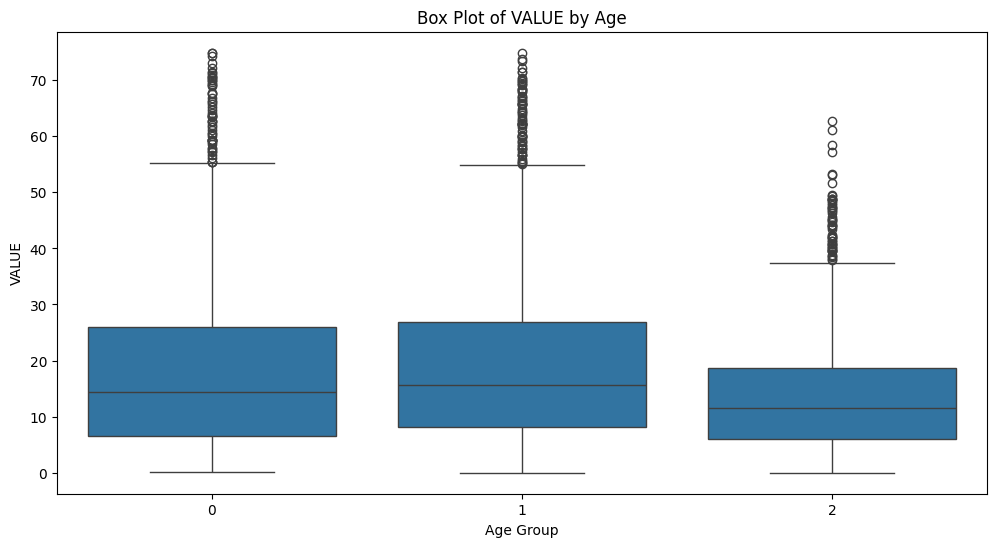

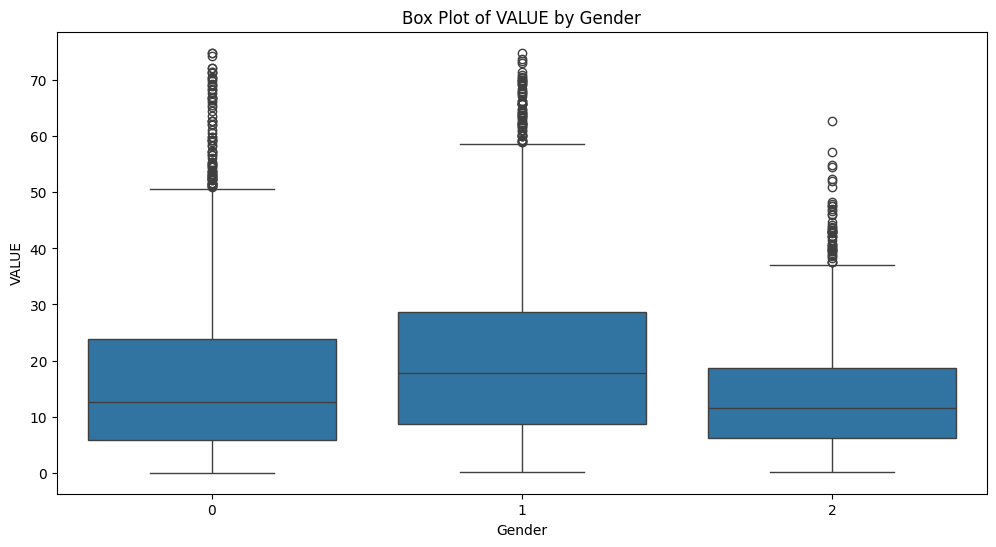

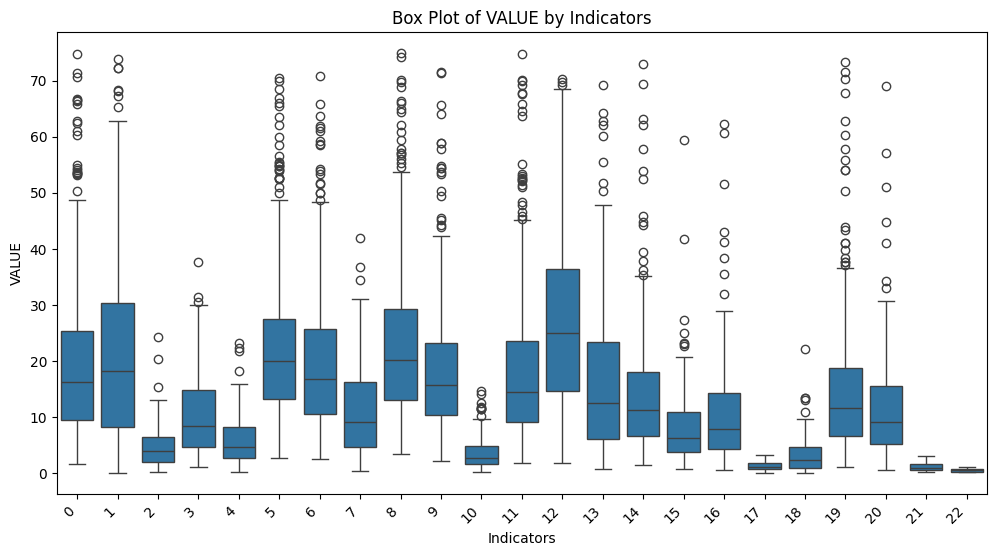

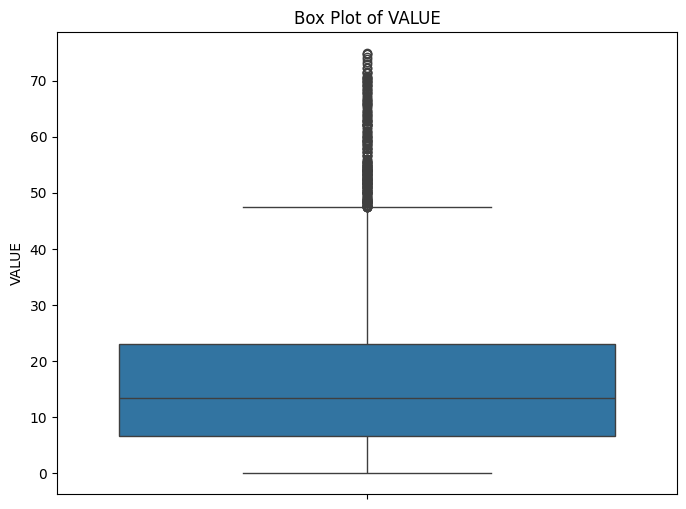

In [181]:
# Create box plots for the specified columns
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age Group', y='VALUE', data=health_data_cleaned)
plt.title('Box Plot of VALUE by Age')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='VALUE', data=health_data_cleaned)
plt.title('Box Plot of VALUE by Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Indicators', y='VALUE', data=health_data_cleaned)
plt.title('Box Plot of VALUE by Indicators')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y='VALUE', data=health_data_cleaned)
plt.title('Box Plot of VALUE')
plt.show()

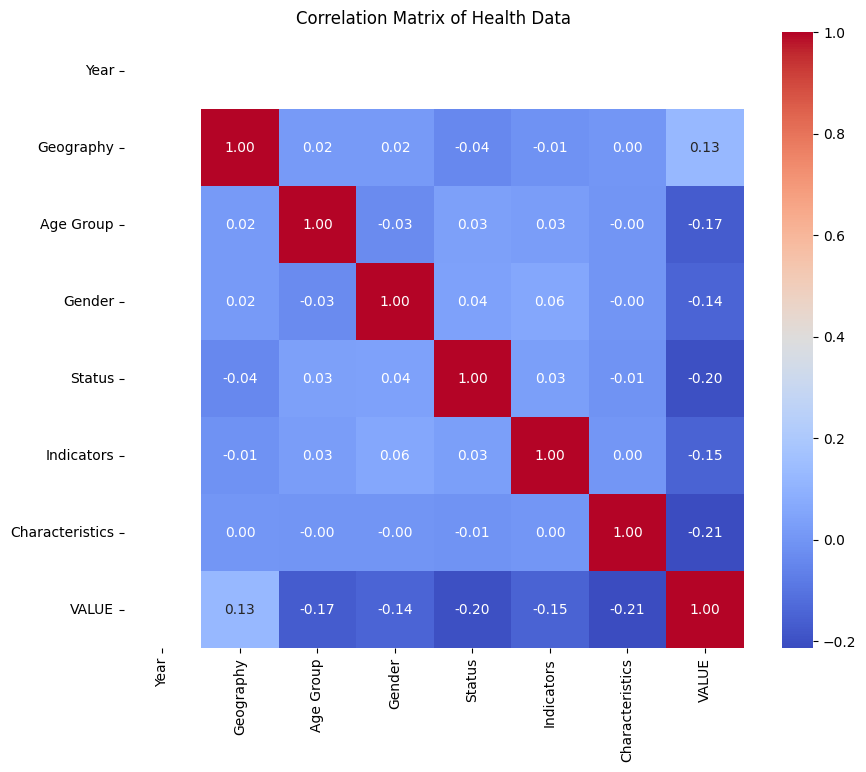

In [182]:
# 1. Correlation Matrix and Heatmap:
# Shows the relationships between numerical features.
correlation_matrix = health_data_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Health Data')
plt.show()



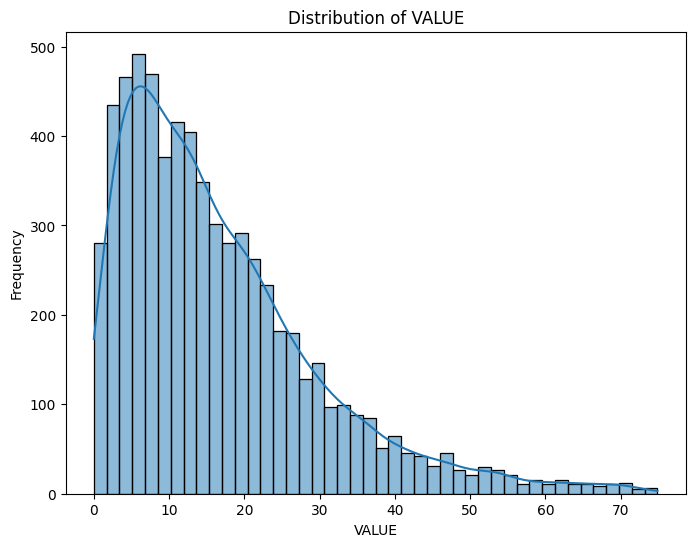

In [157]:
# 2. Histogram of 'VALUE':
# Shows the distribution of the 'VALUE' variable.
plt.figure(figsize=(8, 6))
sns.histplot(health_data_cleaned['VALUE'], kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of VALUE')
plt.xlabel('VALUE')
plt.ylabel('Frequency')
plt.show()

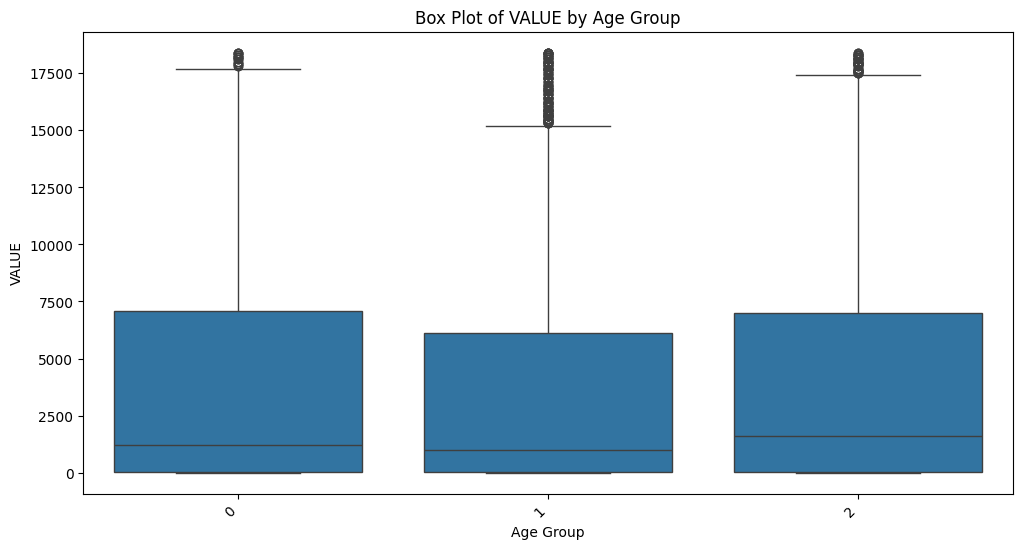

In [63]:
# 3. Box Plot of 'VALUE' by 'Age Group':
# Visualizes the distribution of 'VALUE' across different age groups.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age Group', y='VALUE', data=health_data_cleaned)
plt.title('Box Plot of VALUE by Age Group')
plt.xticks(rotation=45, ha='right')
plt.show()


In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Define the features (independent variables) and target (dependent variable)
features = ['Year', 'Geography', 'Age Group', 'Gender']  # Adjust these as per the dataset
target = 'VALUE'

X = health_data_cleaned[features]  # Feature matrix
y = health_data_cleaned[target]    # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display model coefficients
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': linear_model.coef_})

# Output results
mse, r2, coefficients


(25969410.792008854,
 0.06290578424071369,
      Feature  Coefficient
 0       Year     0.000000
 1  Geography  -349.057916
 2  Age Group  -178.953719
 3     Gender  -234.759435)

In [158]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data (assuming relevant features are selected)
X = health_data_cleaned[['Year', 'Indicators', 'Age Group']]  # Replace with actual feature columns
y = health_data_cleaned['VALUE']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 158.95156011339245
R-squared: 0.03799611494386257


In [159]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data (including categorical features)
X = health_data_cleaned[['Year', 'Indicators', 'Age Group', 'Gender']]  # Replace with actual feature columns
y = health_data_cleaned['VALUE']

# Convert categorical features to numerical using one-hot encoding (if needed)
X = pd.get_dummies(X, columns=['Indicators', 'Age Group', 'Gender'], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 117.01665436868268
R-squared: 0.29179382675678844


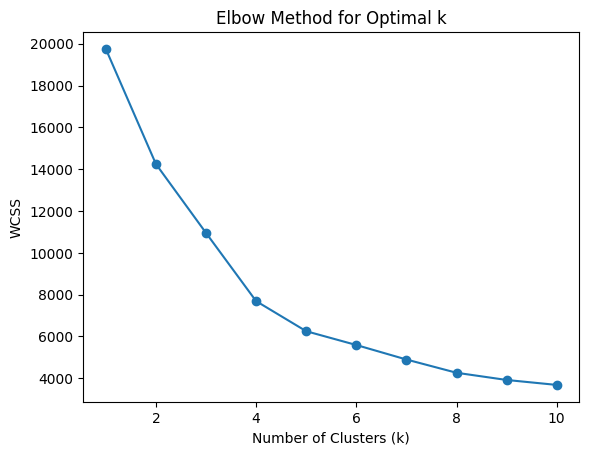

             VALUE    Year  Age Group    Gender
cluster                                        
0        12.056974  2023.0   1.375794  1.744629
1        11.402340  2023.0   1.016577  0.346660
2        38.392101  2023.0   0.674267  0.938111


In [183]:
!pip install scikit-learn
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming health_data_cleaned is your DataFrame

# 1. Select features for clustering
# Choose relevant numerical features for clustering (e.g., 'VALUE', 'Year', etc.)
features_for_clustering = ['VALUE', 'Year', 'Age Group', 'Gender']
X = health_data_cleaned[features_for_clustering]

# 2. Standardize the features (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Determine the optimal number of clusters (using the Elbow method)
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Try different cluster numbers (1 to 10)
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow method graph, choose the optimal k (number of clusters)

# 4. Perform K-means clustering with the chosen k
optimal_k = 3  # Replace with the value you determined from the Elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
health_data_cleaned['cluster'] = kmeans.fit_predict(X_scaled)

# Now, the 'cluster' column in your DataFrame contains the cluster assignments for each data point.

# 5. Analyze the clusters (optional)
# You can now analyze the characteristics of each cluster by grouping your data by the 'cluster' column:
# For example:
cluster_means = health_data_cleaned.groupby('cluster')[features_for_clustering].mean()
print(cluster_means)
# This will show you the average values of the features for each cluster.